# 'Pima Indians Diabetes' prediction

### PIMA Indians are a group of Native Americans living in central and southern Arizona.


### Description

The dataset consists of several medical predictor variables and one target variable, 'Outcome'. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

## Importing Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
path='/Github/Pima_Indians_Diabetes_Database'
import os
os.chdir(path)
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check if there are any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Observations:
# No missing data as all columns have 768 rows of data
# Min value is zero for all variables, except the Age. For example, BMI can't be zero.

## Exploratory Analysis

<AxesSubplot:>

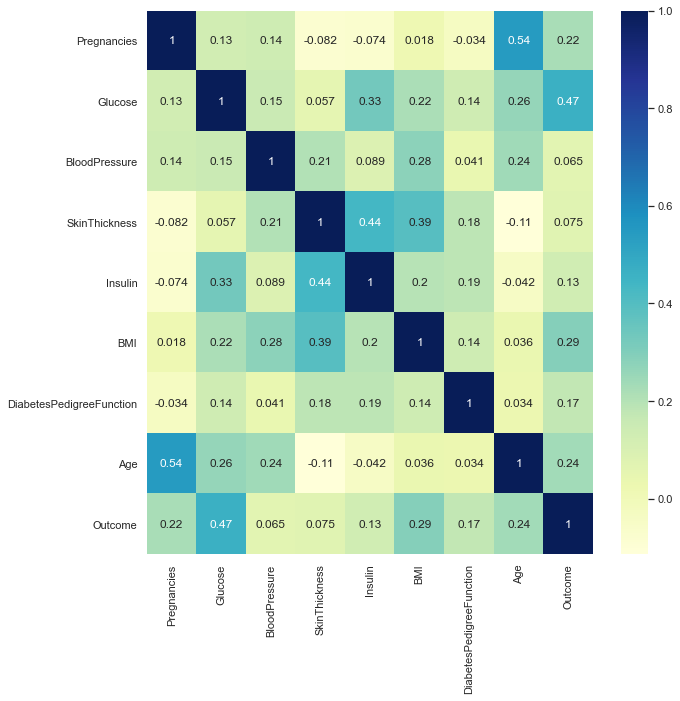

In [9]:
# Plot the Correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)

Text(0.5, 1.0, 'Proportion of diabetes & Healthy in the dataset')

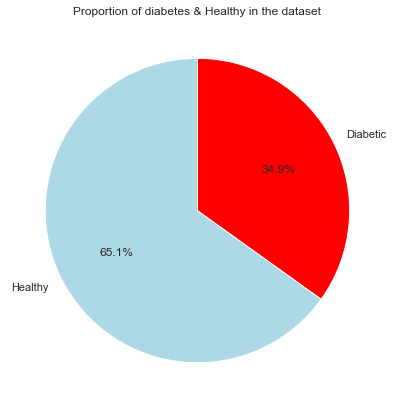

In [10]:
# From df.describe, we can see that the mean of the variable 'outcome' is 0.349
# The value of outcome is 1 for Diabetes and 0 for no-diabetes (Healthy).
# Mean = 0.349 means that 34.9% people in the dataset are diabetic.
# Let's plot this ratio on a pie chart
plt.figure(figsize=(7,7))
plt.pie(df['Outcome'].value_counts(), labels = ['Healthy', 'Diabetic'], autopct = '%.1f%%', 
        colors = ["lightblue","red"], startangle=90)
plt.title('Proportion of diabetes & Healthy in the dataset')

## Detecting and Removing Outliers

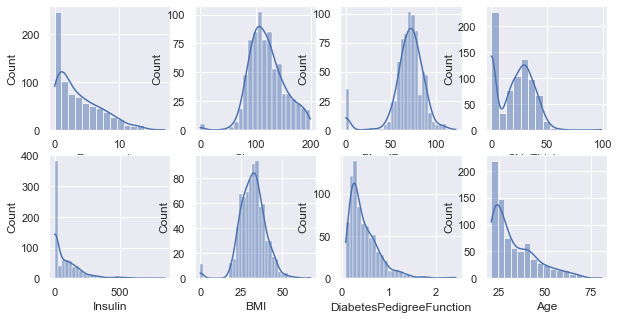

In [11]:
# Checking and dealing with outliers
fig, axes = plt.subplots(2,4,figsize=(10,5))
sns.histplot(df['Pregnancies'], ax=axes[0,0], kde=True)
sns.histplot(df['Glucose'], ax=axes[0,1], kde=True)
sns.histplot(df['BloodPressure'], ax=axes[0,2], kde=True)
sns.histplot(df['SkinThickness'], ax=axes[0,3], kde=True)
sns.histplot(df['Insulin'], ax=axes[1,0], kde=True)
sns.histplot(df['BMI'], ax=axes[1,1], kde=True)
sns.histplot(df['DiabetesPedigreeFunction'], ax=axes[1,2], kde=True)
sns.histplot(df['Age'], ax=axes[1,3], kde=True)
plt.show()

(-1.0, 15.0)

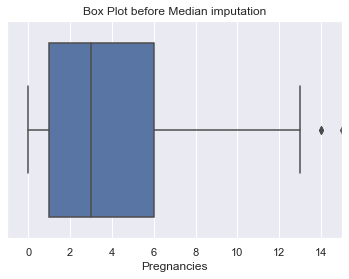

In [12]:
sns.boxplot(x= df['Pregnancies'])
plt.title('Box Plot before Median imputation')
plt.xlim(-1,15)

(-1.0, 15.0)

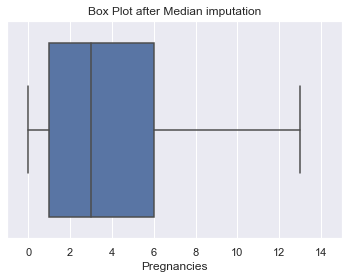

In [13]:
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_Pregnancies = df['Pregnancies'].median()
for i in df['Pregnancies']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['Pregnancies'] = df['Pregnancies'].replace(i, median_Pregnancies)

sns.boxplot(x= df['Pregnancies'])
plt.title('Box Plot after Median imputation')
plt.xlim(-1,15)

(-10.0, 210.0)

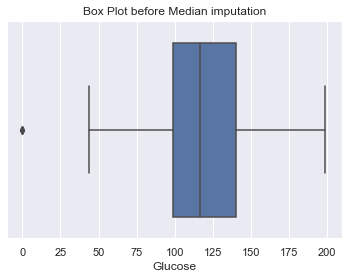

In [14]:
sns.boxplot(x= df['Glucose'])
plt.title('Box Plot before Median imputation')
plt.xlim(-10,210)

(-10.0, 210.0)

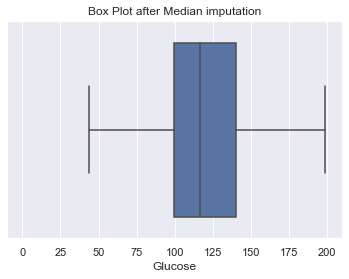

In [15]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_Glucose = df['Glucose'].median()
for i in df['Glucose']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['Glucose'] = df['Glucose'].replace(i, median_Glucose)

sns.boxplot(x= df['Glucose'])
plt.title('Box Plot after Median imputation')
plt.xlim(-10,210)

(-5.0, 125.0)

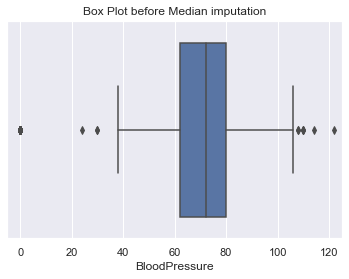

In [16]:
sns.boxplot(x= df['BloodPressure'])
plt.title('Box Plot before Median imputation')
plt.xlim(-5,125)

(-5.0, 125.0)

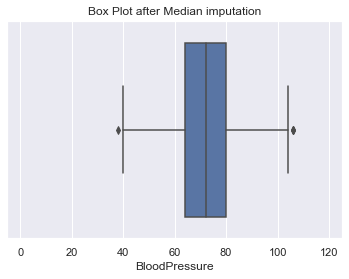

In [17]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_BloodPressure = df['BloodPressure'].median()
for i in df['BloodPressure']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['BloodPressure'] = df['BloodPressure'].replace(i, median_BloodPressure)

sns.boxplot(x= df['BloodPressure'])
plt.title('Box Plot after Median imputation')
plt.xlim(-5,125)

(-5.0, 105.0)

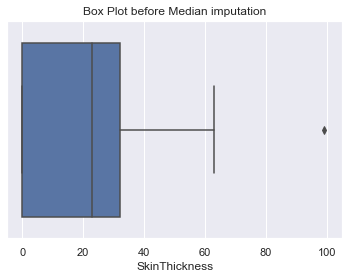

In [18]:
sns.boxplot(x= df['SkinThickness'])
plt.title('Box Plot before Median imputation')
plt.xlim(-5,105)

(-5.0, 105.0)

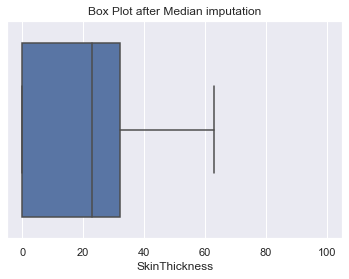

In [19]:
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_SkinThickness = df['SkinThickness'].median()
for i in df['SkinThickness']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['SkinThickness'] = df['SkinThickness'].replace(i, median_SkinThickness)

sns.boxplot(x= df['SkinThickness'])
plt.title('Box Plot after Median imputation')
plt.xlim(-5,105)

(-50.0, 850.0)

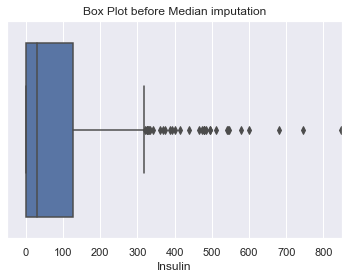

In [20]:
sns.boxplot(x= df['Insulin'])
plt.title('Box Plot before Median imputation')
plt.xlim(-50,850)

(-50.0, 850.0)

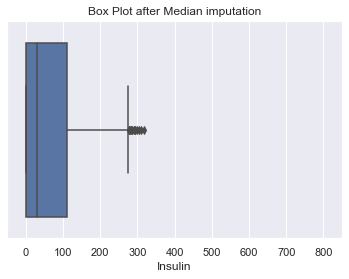

In [21]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_Insulin = df['Insulin'].median()
for i in df['Insulin']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['Insulin'] = df['Insulin'].replace(i, median_Insulin)

sns.boxplot(x= df['Insulin'])
plt.title('Box Plot after Median imputation')
plt.xlim(-50,850)

(-5.0, 75.0)

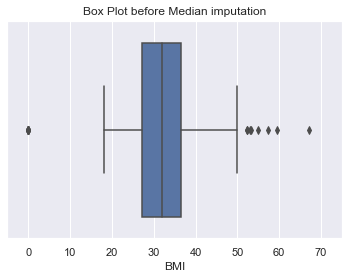

In [22]:
sns.boxplot(x= df['BMI'])
plt.title('Box Plot before Median imputation')
plt.xlim(-5,75)

(-5.0, 75.0)

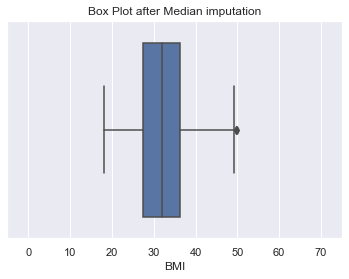

In [23]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_BMI = df['BMI'].median()
for i in df['BMI']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['BMI'] = df['BMI'].replace(i, median_BMI)

sns.boxplot(x= df['BMI'])
plt.title('Box Plot after Median imputation')
plt.xlim(-5,75)

(0.0, 2.5)

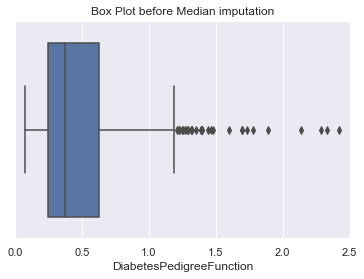

In [24]:
sns.boxplot(x= df['DiabetesPedigreeFunction'])
plt.title('Box Plot before Median imputation')
plt.xlim(0,2.5)

(0.0, 2.5)

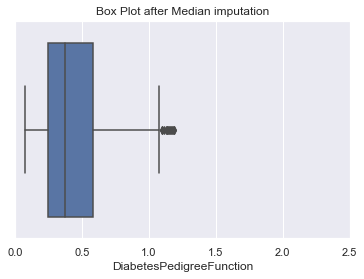

In [25]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_DiabetesPedigreeFunction = df['DiabetesPedigreeFunction'].median()
for i in df['DiabetesPedigreeFunction']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(i, median_DiabetesPedigreeFunction)

sns.boxplot(x= df['DiabetesPedigreeFunction'])
plt.title('Box Plot after Median imputation')
plt.xlim(0,2.5)

(15.0, 85.0)

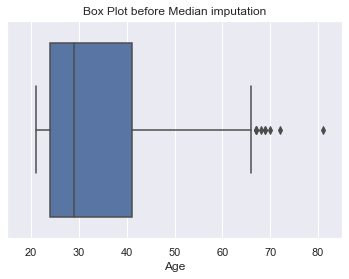

In [26]:
sns.boxplot(x= df['Age'])
plt.title('Box Plot before Median imputation')
plt.xlim(15,85)

(15.0, 85.0)

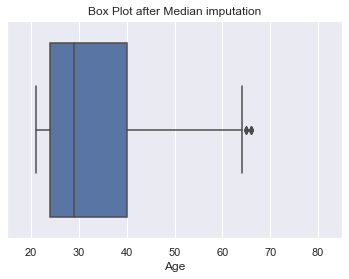

In [27]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

median_Age = df['Age'].median()
for i in df['Age']:
    if ((i < lower_tail) or (i > upper_tail)):
        df['Age'] = df['Age'].replace(i, median_Age)

sns.boxplot(x= df['Age'])
plt.title('Box Plot after Median imputation')
plt.xlim(15,85)

### Pair Plot

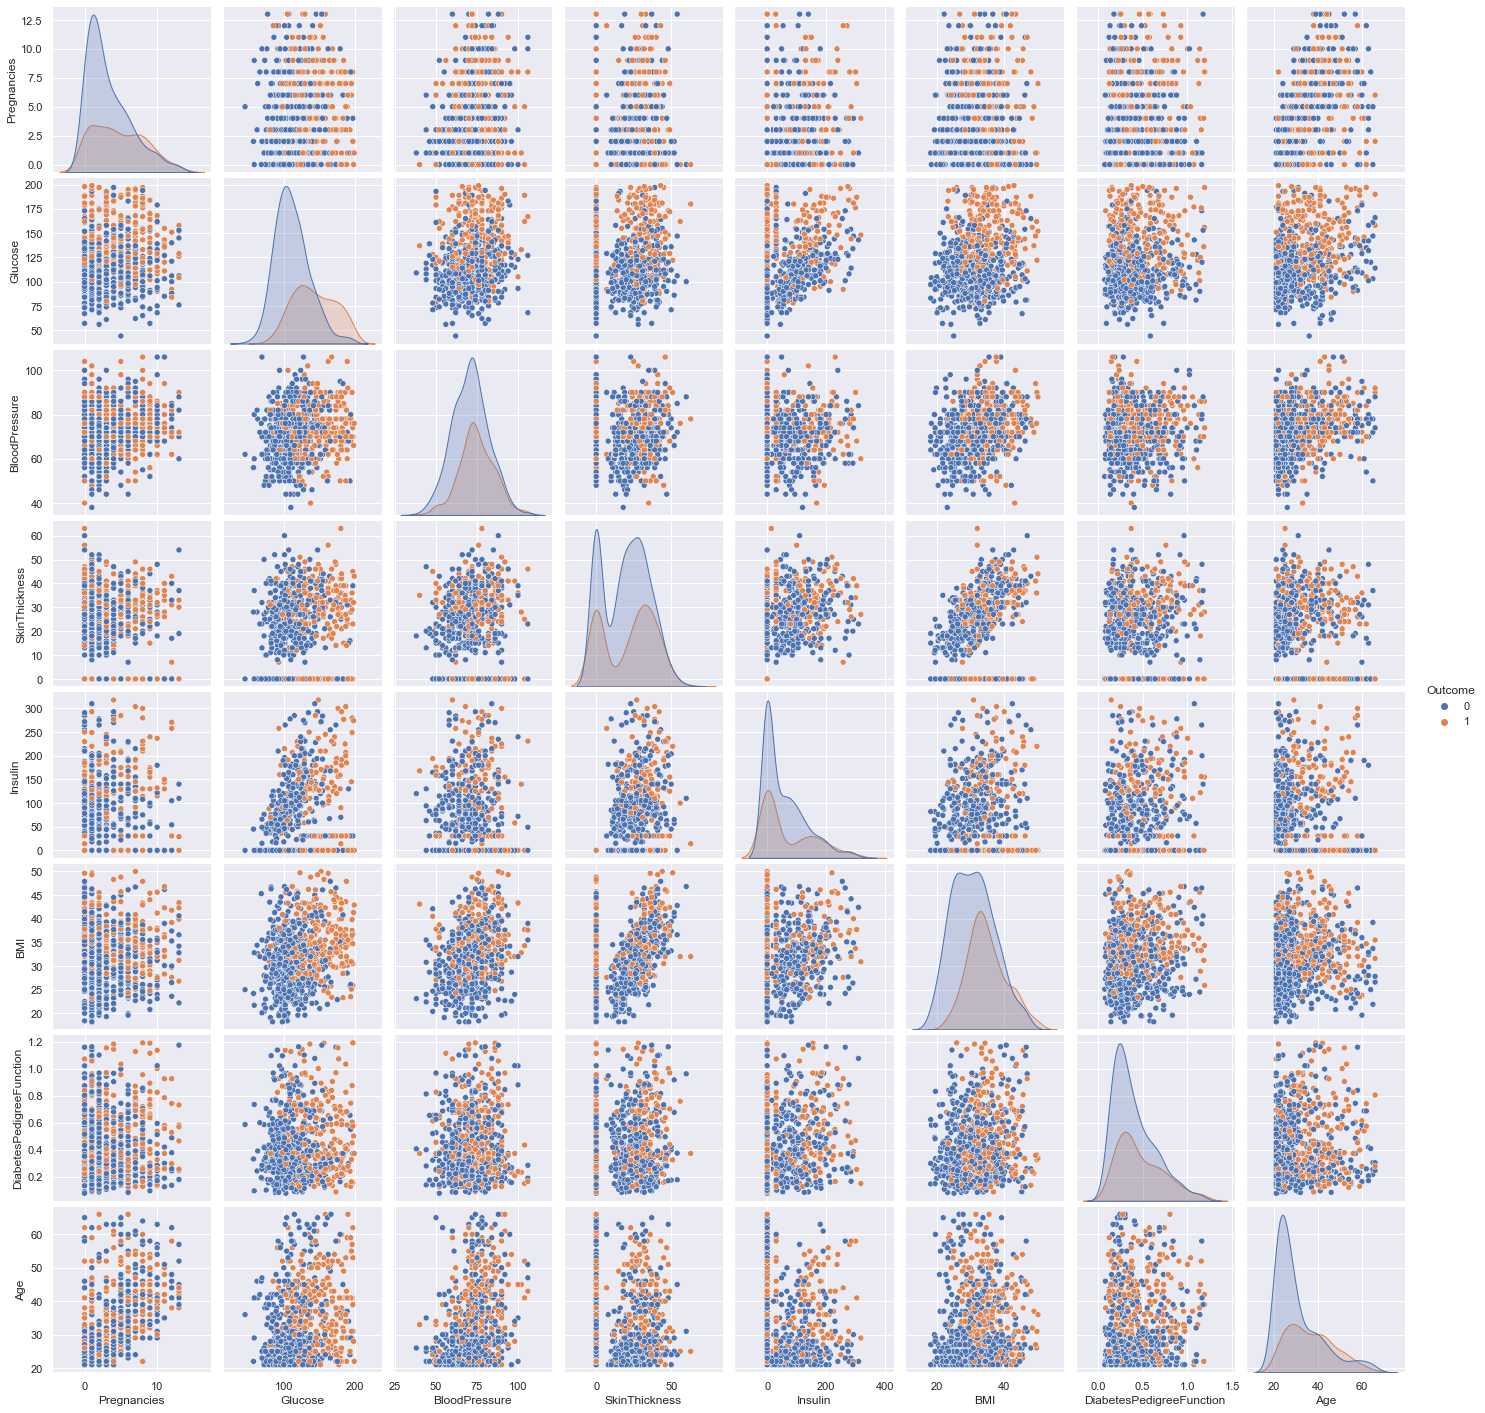

In [28]:
sns.pairplot(data=df, hue='Outcome')

## Declare Inputs and Targets

In [29]:
target = df['Outcome']
features = df.drop(['Outcome'], axis=1)

### Test Train Split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=200)

### Standardise the Data (Feature Scaling)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

array([[ 1.55146697,  1.47826586,  1.42481786, ..., -0.27554276,
        -0.48108033,  1.37783098],
       [ 1.85896493, -0.3300982 , -0.14998083, ..., -0.75399299,
        -1.13339533,  0.58180191],
       [-0.90851669, -0.69846866, -0.49993609, ..., -0.01157022,
         0.09425339,  0.75869726],
       ...,
       [-0.90851669,  0.2392016 ,  0.89988497, ..., -0.75399299,
        -1.23873812, -1.01025623],
       [ 0.6289731 , -1.20079201,  0.5499297 , ..., -0.14355649,
        -0.15694866,  0.75869726],
       [-0.90851669, -0.09568064, -1.19984662, ...,  0.20290746,
        -0.64719782, -0.92180856]])

## Models

## 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [33]:
print('Train Data Accuracy Score:', accuracy_score(y_train, logistic_reg.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, logistic_reg.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, logistic_reg.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, logistic_reg.predict(x_test)))

Train Data Accuracy Score: 0.760586319218241
Test Data Accuracy Score: 0.8116883116883117

Confusion Matrix:
[[95 11]
 [18 30]]

f1_score 0.6741573033707865


## 2. K-Nearest Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # The default 'k' value in sklearn.neighbors.KNeighborsClassifier is 5.
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
print('Train Data Accuracy Score:', accuracy_score(y_train, knn.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, knn.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, knn.predict(x_test)))

Train Data Accuracy Score: 0.8013029315960912
Test Data Accuracy Score: 0.7337662337662337

Confusion Matrix:
[[82 24]
 [17 31]]

f1_score 0.6019417475728155


## 3. Support Vector Machines

In [36]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(x_train, y_train)

SVC(random_state=0)

In [37]:
print('Train Data Accuracy Score:', accuracy_score(y_train, svm.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, svm.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, svm.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, svm.predict(x_test)))

Train Data Accuracy Score: 0.749185667752443
Test Data Accuracy Score: 0.7857142857142857

Confusion Matrix:
[[96 10]
 [23 25]]

f1_score 0.6024096385542168


## 4. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [39]:
print('Train Data Accuracy Score:', accuracy_score(y_train, dtc.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, dtc.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, dtc.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, dtc.predict(x_test)))

Train Data Accuracy Score: 0.9413680781758957
Test Data Accuracy Score: 0.7077922077922078

Confusion Matrix:
[[79 27]
 [18 30]]

f1_score 0.5714285714285714


## 5. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
print('Train Data Accuracy Score:', accuracy_score(y_train, rfc.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, rfc.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, rfc.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, rfc.predict(x_test)))

Train Data Accuracy Score: 1.0
Test Data Accuracy Score: 0.7792207792207793

Confusion Matrix:
[[88 18]
 [16 32]]

f1_score 0.6530612244897959


## 6. Gaussian Naive Bayes (GaussianNB)

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [43]:
print('Train Data Accuracy Score:', accuracy_score(y_train, gnb.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, gnb.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, gnb.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, gnb.predict(x_test)))

Train Data Accuracy Score: 0.750814332247557
Test Data Accuracy Score: 0.7792207792207793

Confusion Matrix:
[[89 17]
 [17 31]]

f1_score 0.6458333333333334


## 7. Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [45]:
print('Train Data Accuracy Score:', accuracy_score(y_train, gbc.predict(x_train)))
print('Test Data Accuracy Score:', accuracy_score(y_test, gbc.predict(x_test)))
print('')

print('Confusion Matrix:')
print(confusion_matrix(y_test, gbc.predict(x_test)))
print('')

print('f1_score', f1_score(y_test, gbc.predict(x_test)))

Train Data Accuracy Score: 0.9185667752442996
Test Data Accuracy Score: 0.7922077922077922

Confusion Matrix:
[[90 16]
 [16 32]]

f1_score 0.6666666666666666


## Summarise the Models' Accuracy

In [47]:
summary = pd.DataFrame()
summary['Model'] = ['Logistic', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 
                   'Gaussian NB', 'Gradient Boosting Classifier']
summary['Accuracy'] = [accuracy_score(y_test, logistic_reg.predict(x_test)), 
                      accuracy_score(y_test, knn.predict(x_test)),
                     accuracy_score(y_test, svm.predict(x_test)), 
                      accuracy_score(y_test, dtc.predict(x_test)),
                     accuracy_score(y_test, rfc.predict(x_test)), 
                      accuracy_score(y_test, gnb.predict(x_test)),
                     accuracy_score(y_test, gbc.predict(x_test))]

summary['f1_score'] = [f1_score(y_test, logistic_reg.predict(x_test)),
                       f1_score(y_test, knn.predict(x_test)),
                       f1_score(y_test, svm.predict(x_test)), 
                       f1_score(y_test, dtc.predict(x_test)),
                       f1_score(y_test, rfc.predict(x_test)), 
                       f1_score(y_test, gnb.predict(x_test)),
                       f1_score(y_test, gbc.predict(x_test))]

summary.sort_values(by = 'Accuracy', ascending=False)

,Model,Accuracy,f1_score
0,Logistic,0.811688,0.674157
6,Gradient Boosting Classifier,0.792208,0.666667
2,SVM,0.785714,0.602410
4,Random Forest,0.779221,0.653061
5,Gaussian NB,0.779221,0.645833
1,KNN,0.733766,0.601942
3,Decision Tree,0.707792,0.571429


## Result:
We can see that Logistic regression has higher accuracy than other models. But for the Logistic regression, by pure chance, the model accuracy of test data is higher than that of train data.

The next highest accuracy is from Gradient Boosting Classifier.